In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.stats as stats

def sample_state(n, theta):
    return math.binomial(n, theta)

def plot_prob_dist(x, pdf, label, color='royalblue', linewidth=2, fill_alpha=0.3):
    plt.figure(figsize=(8, 5))

    # Plot the PDF
    plt.plot(x, pdf, label=label, color=color, linewidth=linewidth)

    # Fill area under the curve
    plt.fill_between(x, pdf, color=color, alpha=fill_alpha)
    
    # Background and grid
    plt.gca().set_facecolor('#f9f9f9')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Titles and labels
    plt.title("Probability Density Function", fontsize=14, weight='bold')
    plt.xlabel("x", fontsize=12)
    plt.ylabel("Probability Density", fontsize=12)

    # Legend
    plt.legend(fontsize=11, frameon=True, fancybox=True, shadow=True)

    # Auto-range with padding
    x_padding = (x.max() - x.min()) * 0.05
    y_padding = (pdf.max() - pdf.min()) * 0.1 if (pdf.max() - pdf.min()) > 0 else 0.1

    plt.xlim(x.min() - x_padding, x.max() + x_padding)
    print(y_padding)
    plt.ylim(0, pdf.max() + y_padding)

    # Layout
    plt.tight_layout()
    plt.show()
    
def plot_discrete_prob_dist(x, pmf, label, color='indigo', markerfmt='o', basefmt=" "):
    plt.figure(figsize=(8, 5))

    # Convert string x-values to integer positions if necessary
    if isinstance(x[0], str):
        x_labels = x
        x_numeric = np.arange(len(x))
    else:
        x_labels = x
        x_numeric = x

    # Plot using numeric positions
    markerline, stemlines, baseline = plt.stem(x_numeric, pmf, label=label, basefmt=basefmt, markerfmt=markerfmt)

    # Style markers and lines
    plt.setp(markerline, color=color, markersize=6)
    plt.setp(stemlines, color=color, linewidth=2)
    plt.setp(baseline, color='gray', linewidth=1, alpha=0.5)

    # Grid and background
    plt.gca().set_facecolor('#f9f9f9')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Labels
    plt.title("Probability Mass Function", fontsize=14, weight='bold')
    plt.xlabel("x", fontsize=12)
    plt.ylabel("Probability", fontsize=12)

    # Use string labels on x-axis if needed
    plt.xticks(ticks=x_numeric, labels=x_labels, fontsize=11)

    # Legend
    plt.legend(fontsize=11, frameon=True, fancybox=True, shadow=True)

    # Smart limits
    x_padding = 0.5 if isinstance(x[0], str) else (max(x_numeric) - min(x_numeric)) * 0.1
    y_padding = (max(pmf) - min(pmf)) * 0.2 if max(pmf) > 0 else 0.1

    plt.xlim(min(x_numeric) - x_padding, max(x_numeric) + x_padding)
    plt.ylim(0, max(pmf) + y_padding)

    plt.tight_layout()
    plt.show()


0.1


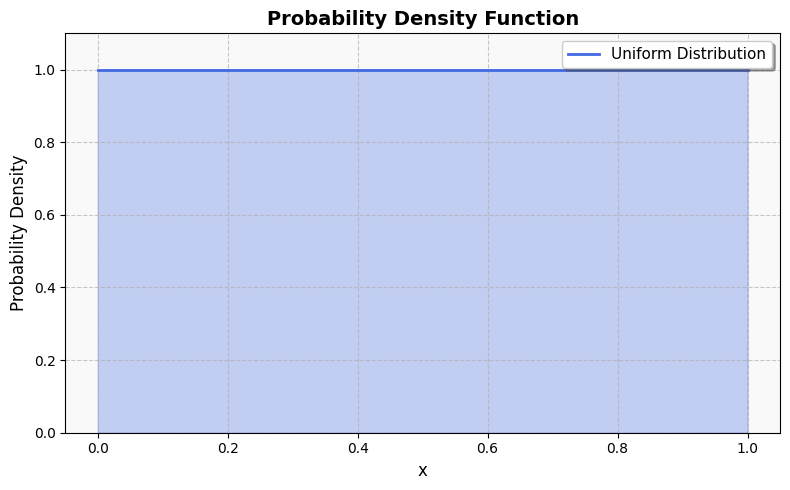

In [2]:
real_theta = 0.5
x = np.linspace(0, 1, 1000)
pdf = stats.uniform(0, 1).pdf(x)
plot_prob_dist(x, pdf, "Uniform Distribution")

In [3]:
def create_all_utterances(min_interval, max_interval, domain):
    min_val, max_val = domain
    domain_range = max_val - min_val + 1
    if min_interval < 1 or max_interval > domain_range or min_interval >= max_interval:
        raise ValueError("Interval out of bounds of the domain.")
    utterances = []
    for interval_range in range(min_interval, max_interval + 1):
        for start in range(min_val, max_val + 1):
            end = start + interval_range - 1
            if end <= max_val:
                utterances.append((start, end))
                
    return utterances

print(create_all_utterances(1, 3, (0, 10)))

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10)]


In [4]:
def literal_listener(utterance, domain):
    min_val, max_val = domain
    start, end = utterance
    if start < min_val or end > max_val or start >= end:
        raise ValueError("Utterance out of bounds of the domain.")
    x = np.arange(min_val, max_val + 1)
    pmf = np.zeros(len(x))
    pmf[start: end + 1] = 1 / (end - start + 1)
    return (x, pmf)

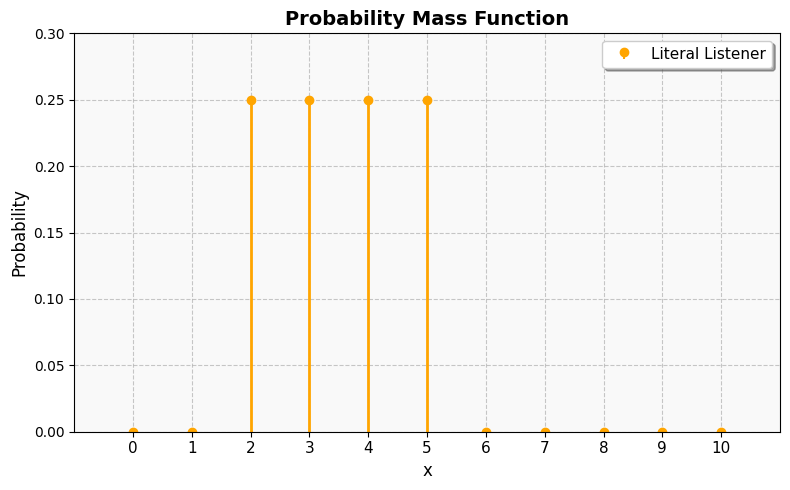

In [5]:
plot_discrete_prob_dist(*literal_listener((2, 5), (0, 10)), "Literal Listener", color='orange')

In [6]:
diff_utt = [(0, 2), (0, 3), (0, 4)]
for utt in diff_utt:
    x, pmf = literal_listener(utt, (0, 20))
    pmf = pmf[pmf > 0]  # Filter out zero probabilities
    entropy = -np.sum(pmf *  np.log2(pmf))
    print(f"Entropy for utterance {utt}: {entropy:.4f}")

Entropy for utterance (0, 2): 1.5850
Entropy for utterance (0, 3): 2.0000
Entropy for utterance (0, 4): 2.3219


In [7]:
min_interval = 2
max_interval = 4
domain = (0, 10)


utterances = create_all_utterances(min_interval, max_interval, domain)
entropies = {}
for utterance in utterances:
    x, pmf = literal_listener(utterance, domain)
    pmf = pmf[pmf > 0]  # Filter out zero probabilities
    entropy = -np.sum(pmf * np.log2(pmf))
    entropies[utterance] = entropy
    
print("Utterances and their entropies:")
for utterance, entropy in entropies.items():
    print(f"Utterance {utterance}: Entropy = {entropy:.4f}")

Utterances and their entropies:
Utterance (0, 1): Entropy = 1.0000
Utterance (1, 2): Entropy = 1.0000
Utterance (2, 3): Entropy = 1.0000
Utterance (3, 4): Entropy = 1.0000
Utterance (4, 5): Entropy = 1.0000
Utterance (5, 6): Entropy = 1.0000
Utterance (6, 7): Entropy = 1.0000
Utterance (7, 8): Entropy = 1.0000
Utterance (8, 9): Entropy = 1.0000
Utterance (9, 10): Entropy = 1.0000
Utterance (0, 2): Entropy = 1.5850
Utterance (1, 3): Entropy = 1.5850
Utterance (2, 4): Entropy = 1.5850
Utterance (3, 5): Entropy = 1.5850
Utterance (4, 6): Entropy = 1.5850
Utterance (5, 7): Entropy = 1.5850
Utterance (6, 8): Entropy = 1.5850
Utterance (7, 9): Entropy = 1.5850
Utterance (8, 10): Entropy = 1.5850
Utterance (0, 3): Entropy = 2.0000
Utterance (1, 4): Entropy = 2.0000
Utterance (2, 5): Entropy = 2.0000
Utterance (3, 6): Entropy = 2.0000
Utterance (4, 7): Entropy = 2.0000
Utterance (5, 8): Entropy = 2.0000
Utterance (6, 9): Entropy = 2.0000
Utterance (7, 10): Entropy = 2.0000


In [8]:
def truncated_normal(mean, std, min_x, max_x):
    # Convert bounds to standardized space (Z-scores)
    a, b = (min_x - mean) / std, (max_x - mean) / std

    # Create the truncated normal distribution
    dist = stats.truncnorm(a, b, loc=mean, scale=std)
    return dist

0.14274921164085475


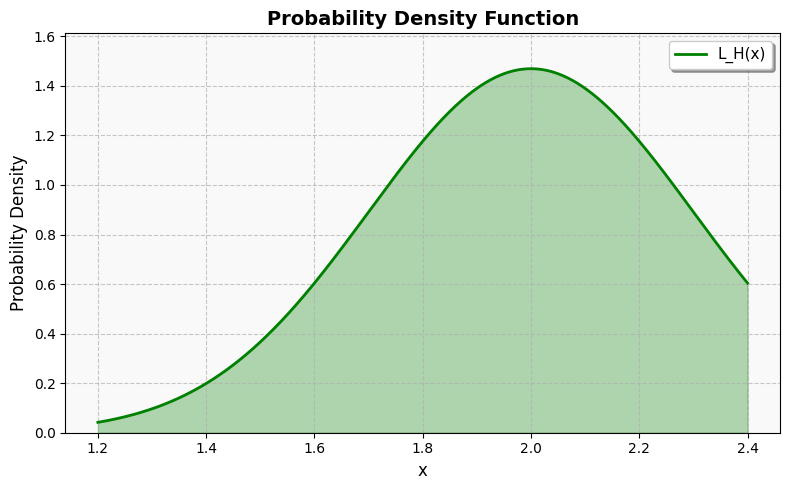

In [9]:
min_value = 1.2
max_value = 2.4
mean = 2.0
std = 0.3
x = np.linspace(min_value, max_value, 1000)
belief = truncated_normal(mean, std, min_value, max_value)
plot_prob_dist(x, belief.pdf(x), "L_H(x)", color='green')

In [10]:
def literal_speaker(state, utterances, domain):
    probs = []
    for utterance in utterances:
        if utterance[0] <= state <= utterance[1]:
            probs.append(1.0)
        else:
            probs.append(0.0)
    probs = np.array(probs)
    probs /= np.sum(probs) if np.sum(probs) > 0 else 1.0
    result = {utt: prob for utt, prob in zip(utterances, probs)}
    return result

def informativeness_all_utterances(state, utterances, domain):

    result = {}
    for utt in utterances:
        x, pmf = literal_listener(utt, domain)
        result[utt] = pmf[np.where(x == state)[0][0]]
    return result

def persuasiveness_all_utterances(pers, utterances, domain):
        
    result = {u: 0.0 for u in utterances}

    for utt in utterances:
        if pers == "inf":
            result[utt] = 1
        else:
            x, pmf = literal_listener(utt, domain)
            for i in range(len(pmf)):
                result[utt] += x[i] * pmf[i]
            result[utt] = (result[utt] - domain[0])/ (domain[1] - domain[0])
            if pers == "low":
                result[utt] = 1 - result[utt]
    return result

def pragmatic_speaker(state, pers, utterances, domain, alpha=1.0):
    # Compute informativeness and persuasiveness
    informativeness = informativeness_all_utterances(state, utterances, domain)
    persuasiveness = persuasiveness_all_utterances(pers, utterances, domain)

    if pers == "inf":
        beta = 1.0
    else:
        beta = 0.0
    # Compute softmax weights
    scores = []
    for utt in utterances:
        info = informativeness.get(utt, 0.0)
        pers_val = persuasiveness.get(utt, 0.0)

        if info > 0:
            score = (info ** (alpha * beta)) * (pers_val ** (alpha * (1 - beta)))
        else:
            score = 0.0
        scores.append(score)

    scores = np.array(scores)
    probs = scores / np.sum(scores) if np.sum(scores) > 0 else np.ones_like(scores) / len(scores)
    return {utt: p for utt, p in zip(utterances, probs)}


In [11]:
min_interval = 3
max_interval = 5
domain = (0, 20)


utterances = create_all_utterances(min_interval, max_interval, domain)
persusaviness = persuasiveness_all_utterances("high", utterances, domain)
#print("Persuasiveness of utterances:")
# for utt, pers in persusaviness.items():
#     print(f"Utterance {utt}: Persuasiveness = {pers:.4f}")



pragmatic_speaker_p = pragmatic_speaker(13, "high", utterances, domain, alpha=10.0)
print("Pragmatic Speaker Probabilities:")
for utt, prob in pragmatic_speaker_p.items():
    print(f"Utterance {utt}: Probability = {prob:.4f}")

Pragmatic Speaker Probabilities:
Utterance (0, 2): Probability = 0.0000
Utterance (1, 3): Probability = 0.0000
Utterance (2, 4): Probability = 0.0000
Utterance (3, 5): Probability = 0.0000
Utterance (4, 6): Probability = 0.0000
Utterance (5, 7): Probability = 0.0000
Utterance (6, 8): Probability = 0.0000
Utterance (7, 9): Probability = 0.0000
Utterance (8, 10): Probability = 0.0000
Utterance (9, 11): Probability = 0.0000
Utterance (10, 12): Probability = 0.0000
Utterance (11, 13): Probability = 0.0266
Utterance (12, 14): Probability = 0.0593
Utterance (13, 15): Probability = 0.1243
Utterance (14, 16): Probability = 0.0000
Utterance (15, 17): Probability = 0.0000
Utterance (16, 18): Probability = 0.0000
Utterance (17, 19): Probability = 0.0000
Utterance (18, 20): Probability = 0.0000
Utterance (0, 3): Probability = 0.0000
Utterance (1, 4): Probability = 0.0000
Utterance (2, 5): Probability = 0.0000
Utterance (3, 6): Probability = 0.0000
Utterance (4, 7): Probability = 0.0000
Utterance (

In [12]:
def pragmatic_listener_paper(utt, utterances, domain, alpha=3.0):
    state_prior = 1.0 / (domain[1] - domain[0] + 1)
    psi_prior = 1 / 3
    result = {}
    # inf case
    all_states = np.arange(domain[0], domain[1] + 1)
    for state in all_states:
        res_inf = pragmatic_speaker(state, "inf", utterances, domain, alpha=alpha)[utt]
        res_high = pragmatic_speaker(state, "high", utterances, domain, alpha=alpha)[utt]
        res_low = pragmatic_speaker(state, "low", utterances, domain, alpha=alpha)[utt]
        result["inf", state] = res_inf * state_prior * psi_prior
        result["high", state] = res_high * state_prior * psi_prior
        result["low", state] = res_low * state_prior * psi_prior
    # Normalize
    total_prob = sum(result.values())
    result = {k: v / total_prob for k, v in result.items()}

    return result

def pragmatic_listener_state(joint):
    x, pmf = [], []
    state_probs = {}
    for (psi, state), prob in joint.items():
        state_probs[state] = state_probs.get(state, 0.0) + prob
    for state, prob in state_probs.items():
        x.append(state)
        pmf.append(prob)
    return (x, pmf)

def pragmatic_listener_psi(joint):
    x, pmf = [], []
    psi_probs = {}
    for (psi, state), prob in joint.items():
        psi_probs[psi] = psi_probs.get(psi, 0.0) + prob
    for psi, prob in psi_probs.items():
        x.append(psi)
        pmf.append(prob)
    return (x, pmf)


In [13]:
def get_truncnorm_bounds(rv):
    # These are hidden inside the frozen object
    a_std, b_std = rv.args       # standardized bounds
    loc = rv.kwds.get('loc', 0)
    scale = rv.kwds.get('scale', 1)

    # Recover original lower and upper bounds
    lower = a_std * scale + loc
    upper = b_std * scale + loc
    return lower, upper

In [14]:
def pragmatic_listener_my(utt, utterances, domain, belief, alpha=3.0):
    state_prior = 1.0 / (domain[1] - domain[0] + 1)
    psi_prior = {"inf": 1.0, "high": 0.0, "low": 0.0}
    result = {}
    
    # Compute suspicion
    x, pmf = literal_listener(utt, domain)
    given_expectation = 0
    for i in range(len(pmf)):
        given_expectation += x[i] * pmf[i]
    pmf = pmf[pmf > 0]  # Filter out zero probabilities
    entropy = -np.sum(pmf * np.log2(pmf))

    
    lower, upper = get_truncnorm_bounds(belief)
    if entropy < lower:
        print("Entropy is below lower bound, setting psi_prior to inf")
        psi_prior["inf"] = 1.0
        psi_prior["high"] = 0.0
        psi_prior["low"] = 0.0
    elif entropy > upper:
        print("Entropy is below lower bound, setting psi_prior to inf")
        psi_prior["inf"] = 0.0
        psi_prior["high"] = (given_expectation - domain[0]) / (domain[1] - domain[0])
        psi_prior["low"] = 1 - psi_prior["high"]
    else:
        print("Entropy is within bounds, calculating suspicion")
        suspicion = belief.cdf(entropy)
        print(f"Calculated suspicion: {suspicion:.4f}")
        psi_prior["inf"] = 1 - suspicion
        psi_prior["high"] = suspicion  * (given_expectation - domain[0]) / (domain[1] - domain[0])
        psi_prior["low"] = suspicion - psi_prior["high"]
    
    all_states = np.arange(domain[0], domain[1] + 1)
    x = []
    pmf = []
    for state in all_states:
        res_inf = pragmatic_speaker(state, "inf", utterances, domain, alpha=alpha)[utt]
        res_high = pragmatic_speaker(state, "high", utterances, domain, alpha=alpha)[utt]
        res_low = pragmatic_speaker(state, "low", utterances, domain, alpha=alpha)[utt]
        x.append(state)
        pmf.append(state_prior * (res_inf * psi_prior["inf"] + res_high * psi_prior["high"] + res_low * psi_prior["low"]))
    # Normalize
    pmf = np.array(pmf)
    pmf /= np.sum(pmf)
    x_psi = ["inf", "high", "low"]
    pmf_psi = [psi_prior["inf"], psi_prior["high"], psi_prior["low"]]
    return x, pmf, x_psi, pmf_psi

In [31]:
def get_entropy(utt, domain):
    x, pmf = literal_listener(utt, domain)
    pmf = pmf[pmf > 0]  # Filter out zero probabilities
    entropy = -np.sum(pmf * np.log2(pmf))
    return entropy

In [32]:
def posterior_utterance_distribution(utt, utterances, domain, alpha=3.0):
    utterance_probs = {u: 0.0 for u in utterances}
    all_states = np.arange(domain[0], domain[1] + 1)
    for state in all_states:
        x_state, pmf_state = pragmatic_listener_inf(utt, utterances, domain, alpha=alpha)
        speaker_utt_probs = pragmatic_speaker(state, "inf", utterances, domain, alpha=alpha)
        for u in utterances:
            utterance_probs[u] += pmf_state[x_state.index(state)] * speaker_utt_probs[u]
            
    return utterance_probs

In [33]:
def entropy_distribution(utt, utterances, domain, alpha=3.0):
    utterance_probs = posterior_utterance_distribution(utt, utterances, domain, alpha=alpha)
    entropies = {}
    for u, prob in utterance_probs.items():
        entropy = get_entropy(u, domain)
        entropies[entropy] = entropies.get(entropy, 0) + prob
    x, pmf = zip(*sorted(entropies.items()))
    return x, pmf
    

In [ ]:
def get_suspicion_pvalue(utt, utterances, domain, belief, alpha=3.0):
    x_ent, pmf_ent = entropy_distribution(utt, utterances, domain, alpha=alpha)
    utt_ent = get_entropy(utt, domain)
    return suspicion

In [49]:
min_interval = 3
max_interval = 5
domain = (0, 20)
utterance = (4, 6)
all_states = np.arange(domain[0], domain[1] + 1)
utterances = create_all_utterances(min_interval, max_interval, domain)
post_dist = posterior_utterance_distribution(utterance, utterances, domain, alpha=3.0)
x, pmf = entropy_distribution(utterance, utterances, domain, alpha=3.0)

#good print
print("Posterior Utterance Distribution:")
for utt, prob in post_dist.items():
    print(f"Utterance {utt}: Probability = {prob:.4f}")

print("Entropy Distribution:")
for entropy, prob in zip(x, pmf):
    print(f"Entropy {entropy}: Probability = {prob:.4f}")

Posterior Utterance Distribution:
Utterance (0, 2): Probability = 0.0000
Utterance (1, 3): Probability = 0.0000
Utterance (2, 4): Probability = 0.0578
Utterance (3, 5): Probability = 0.1156
Utterance (4, 6): Probability = 0.1734
Utterance (5, 7): Probability = 0.1156
Utterance (6, 8): Probability = 0.0578
Utterance (7, 9): Probability = 0.0000
Utterance (8, 10): Probability = 0.0000
Utterance (9, 11): Probability = 0.0000
Utterance (10, 12): Probability = 0.0000
Utterance (11, 13): Probability = 0.0000
Utterance (12, 14): Probability = 0.0000
Utterance (13, 15): Probability = 0.0000
Utterance (14, 16): Probability = 0.0000
Utterance (15, 17): Probability = 0.0000
Utterance (16, 18): Probability = 0.0000
Utterance (17, 19): Probability = 0.0000
Utterance (18, 20): Probability = 0.0000
Utterance (0, 3): Probability = 0.0000
Utterance (1, 4): Probability = 0.0244
Utterance (2, 5): Probability = 0.0488
Utterance (3, 6): Probability = 0.0731
Utterance (4, 7): Probability = 0.0731
Utterance 

In [15]:
def posterior_predictive_check(utt, utterances, domain, belief, alpha=3.0):
    state_prior = 1.0 / (domain[1] - domain[0] + 1)
    psi_prior = {"inf": 1.0, "high": 0.0, "low": 0.0}
    result = {}
    all_states = np.arange(domain[0], domain[1] + 1)
    
    utterance_posteriors = {}
    state_inf_x, state_inf_pmf = pragmatic_listener_inf(utt, utterances, domain, alpha=alpha)
    for u in utterances:
        post_prob = 0
        for state in all_states:
            post_prob += pragmatic_speaker(state, "inf", utterances, domain, alpha=alpha)[u] * state_inf_pmf[state_inf_x.index(state)]
        utterance_posteriors[u] = post_prob
    
    utterance_posteriors = {k: v / sum(utterance_posteriors.values()) for k, v in utterance_posteriors.items()}
        
    # Compute suspicion
    x, pmf = literal_listener(utt, domain)
    given_expectation = 0
    for i in range(len(pmf)):
        given_expectation += x[i] * pmf[i]
    pmf = pmf[pmf > 0]  # Filter out zero probabilities
    entropy = -np.sum(pmf * np.log2(pmf))
    
    suspicion = 0
    for u, prob in utterance_posteriors.items():
        x, pmf = literal_listener(u, domain)
        pmf = pmf[pmf > 0]
        entropy_u = -np.sum(pmf * np.log2(pmf))
        if entropy_u < entropy:
            suspicion += prob
    print(f"Suspicion: {suspicion:.4f}")
    psi_prior["inf"] = 1 - suspicion
    psi_prior["high"] = suspicion  * (given_expectation - domain[0]) / (domain[1] - domain[0])
    psi_prior["low"] = suspicion - psi_prior["high"]

    x = []
    pmf = []
    for state in all_states:
        res_inf = pragmatic_speaker(state, "inf", utterances, domain, alpha=alpha)[utt]
        res_high = pragmatic_speaker(state, "high", utterances, domain, alpha=alpha)[utt]
        res_low = pragmatic_speaker(state, "low", utterances, domain, alpha=alpha)[utt]
        x.append(state)
        pmf.append(state_prior * (res_inf * psi_prior["inf"] + res_high * psi_prior["high"] + res_low * psi_prior["low"]))
    # Normalize
    pmf = np.array(pmf)
    pmf /= np.sum(pmf)
    x_psi = ["inf", "high", "low"]
    pmf_psi = [psi_prior["inf"], psi_prior["high"], psi_prior["low"]]
    return x, pmf, x_psi, pmf_psi

In [16]:
min_interval = 3
max_interval = 5
domain = (0, 20)
utterance = (13, 17)


utterances = create_all_utterances(min_interval, max_interval, domain)


pragmatic_listener_paper_joint = pragmatic_listener_paper(utterance, utterances, domain, alpha=3)
x_state, pmf_state = pragmatic_listener_state(pragmatic_listener_paper_joint)
x_state_my, pmf_state_my, x_psi_my, pmf_psi_my = pragmatic_listener_my(utterance, utterances, domain, belief, alpha=3)
x_state_post, pmf_state_post, x_psi_post, pmf_psi_post = posterior_predictive_check(utterance, utterances, domain, belief, alpha=3)
print(pmf_state_my)
print(pmf_state_post)
plot_discrete_prob_dist(x_state_my, pmf_state_my, "Pragmatic Listener My State Probabilities", color='blue', markerfmt='o')
plot_discrete_prob_dist(x_state_post, pmf_state_post, "Pragmatic Listener State Probabilities", color='purple', markerfmt='o')


x_psi, pmf_psi = pragmatic_listener_psi(pragmatic_listener_paper_joint)
plot_discrete_prob_dist(x_psi_my, pmf_psi_my, "Pragmatic Listener My Psi Probabilities", color='orange', markerfmt='o')
plot_discrete_prob_dist(x_psi_post, pmf_psi_post, "Pragmatic Listener Psi Probabilities", color='red', markerfmt='o')


# print("Pragmatic Listener Joint Probabilities:")
# for (psi, theta), prob in pragmatic_listener_paper_joint.items():
#     print(f"Psi {psi}, State {theta}: Probability = {prob:.4f}")
    

# print("Pragmatic Listener Theta Probabilities:")
# for state, prob in pragmatic_listener_paper_theta.items(): 
#     print(f"State {state}: Probability = {prob:.4f}")
    
# pragmatic_listener_paper_psi = pragmatic_listener_psi(pragmatic_listener_paper_joint)
# print("Pragmatic Listener Psi Probabilities:")
# for psi, prob in pragmatic_listener_paper_psi.items():
#     print(f"Psi {psi}: Probability = {prob:.4f}")


Entropy is within bounds, calculating suspicion
Calculated suspicion: 0.9443


NameError: name 'pragmatic_listener_inf' is not defined

In [ ]:
#print
print("Pragmatic Listener My Joint Probabilities:")
for (psi, theta), prob in pragmatic_listener_paper_joint.items():
    print(f"Psi {psi}, State {theta}: Probability = {prob:.4f}")



Pragmatic Listener My Joint Probabilities:
Psi inf, State 0: Probability = 0.0000
Psi high, State 0: Probability = 0.0000
Psi low, State 0: Probability = 0.0000
Psi inf, State 1: Probability = 0.0000
Psi high, State 1: Probability = 0.0000
Psi low, State 1: Probability = 0.0000
Psi inf, State 2: Probability = 0.0000
Psi high, State 2: Probability = 0.0000
Psi low, State 2: Probability = 0.0000
Psi inf, State 3: Probability = 0.0000
Psi high, State 3: Probability = 0.0000
Psi low, State 3: Probability = 0.0000
Psi inf, State 4: Probability = 0.0000
Psi high, State 4: Probability = 0.0000
Psi low, State 4: Probability = 0.0000
Psi inf, State 5: Probability = 0.0000
Psi high, State 5: Probability = 0.0000
Psi low, State 5: Probability = 0.0000
Psi inf, State 6: Probability = 0.0000
Psi high, State 6: Probability = 0.0000
Psi low, State 6: Probability = 0.0000
Psi inf, State 7: Probability = 0.0000
Psi high, State 7: Probability = 0.0000
Psi low, State 7: Probability = 0.0000
Psi inf, Stat

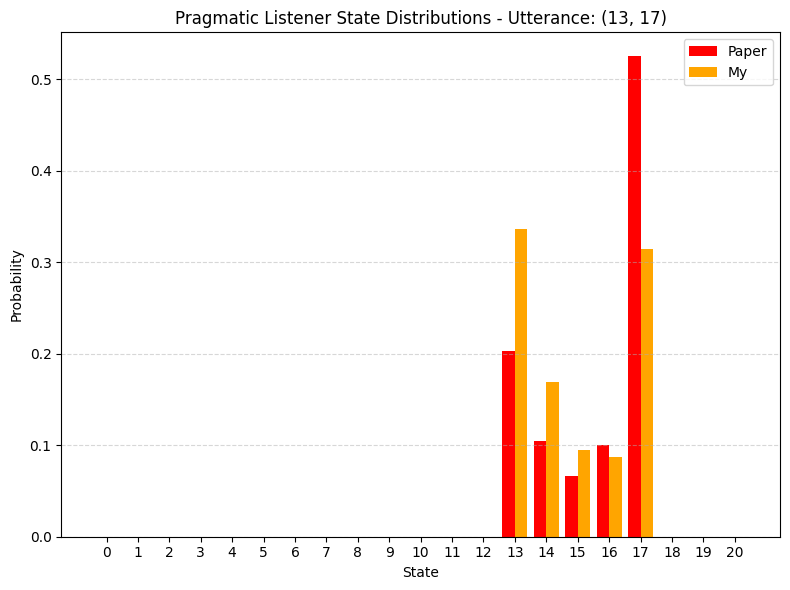

In [ ]:
# Get full domain from both state x-arrays
x_min = min(min(x_state), min(x_state_my))
x_max = max(max(x_state), max(x_state_my))
full_x = np.arange(x_min, x_max + 1)

# Fill missing values with 0
pmf_state_full = np.zeros_like(full_x, dtype=float)
for i, val in enumerate(x_state):
    idx = np.where(full_x == val)[0]
    if len(idx) > 0:
        pmf_state_full[idx[0]] = pmf_state[i]

pmf_state_my_full = np.zeros_like(full_x, dtype=float)
for i, val in enumerate(x_state_my):
    idx = np.where(full_x == val)[0]
    if len(idx) > 0:
        pmf_state_my_full[idx[0]] = pmf_state_my[i]

# Plot both
plt.figure(figsize=(8, 6))
bar_width = 0.4
plt.bar(full_x - bar_width/2, pmf_state_full, width=bar_width, label='Paper', color='red')
plt.bar(full_x + bar_width/2, pmf_state_my_full, width=bar_width, label='My', color='orange')

plt.xticks(full_x)
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Pragmatic Listener State Distributions - Utterance: " + str(utterance))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


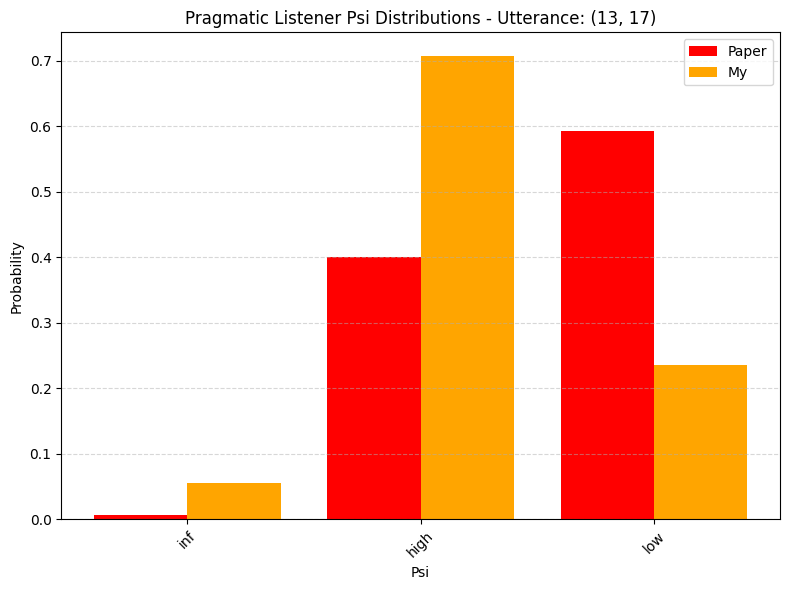

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Use the original ordering from x_psi (assuming same as x_psi_my)
x_str_psi = [str(x) for x in x_psi]
indices = np.arange(len(x_psi))

# Plot both
plt.figure(figsize=(8, 6))
bar_width = 0.4
plt.bar(indices - bar_width/2, pmf_psi, width=bar_width, label='Paper', color='red')
plt.bar(indices + bar_width/2, pmf_psi_my, width=bar_width, label='My', color='orange')

plt.xticks(indices, x_str_psi, rotation=45)
plt.xlabel("Psi")
plt.ylabel("Probability")
plt.title("Pragmatic Listener Psi Distributions - Utterance: " + str(utterance))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [18]:
def pragmatic_listener_inf(utt, utterances, domain, alpha=3.0):
    state_prior = 1.0 / (domain[1] - domain[0] + 1)
    x = []
    pmf = []
    # inf case
    all_states = np.arange(domain[0], domain[1] + 1)
    for state in all_states:
        res_inf = pragmatic_speaker(state, "inf", utterances, domain, alpha=alpha)[utt]
        x.append(state)
        pmf.append(res_inf * state_prior)
    pmf = np.array(pmf)
    pmf /= np.sum(pmf)
    return x, pmf

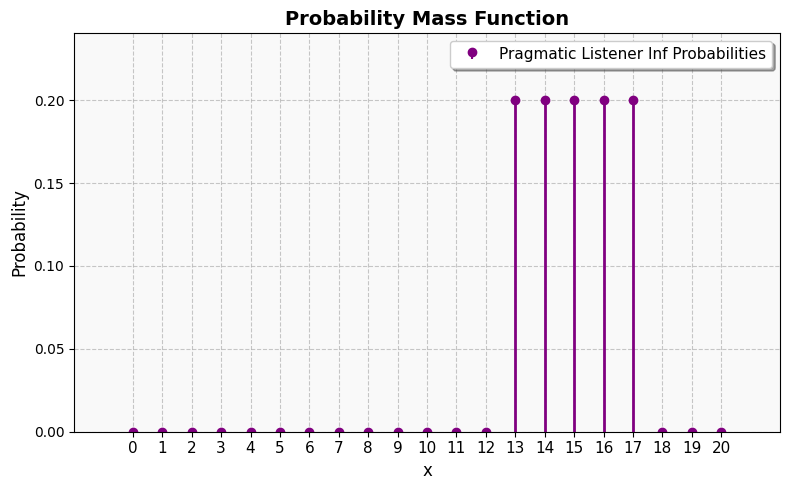

In [ ]:
x, pmf = pragmatic_listener_inf(utterance, utterances, domain, alpha=10.0)
plot_discrete_prob_dist(x, pmf, "Pragmatic Listener Inf Probabilities", color='purple', markerfmt='o')